# РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Коняева Марина Александровна
##### Группа:   НФИбд-01-21

## Москва 2024
***

### Вариант № 25
     

1. Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса.

In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [363]:
url = 'eighthr.data'
my_data = pd.read_csv(url, header=None )
my_data.rename(columns=lambda x: x + 1, inplace=True)
my_data

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2530,12/28/2004,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2531,12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2532,12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


Первый признак: WSR_AV (столбец No 27) 

Второй признак: T_AV (столбец No 53) 

Третий признак: SLP (столбец No 71) 

Класс: class (столбец No 74)

In [364]:
my_data = my_data[[27,53,71,74]]
my_data

,27,53,71,74
0,3.1,12.5,10330,0.0
1,3.4,17.8,10275,0.0
2,3.5,18.7,10235,0.0
3,3.2,18.7,10195,0.0
4,2.3,21.1,?,0.0
...,...,...,...,...
2529,1.6,7.7,10295,0.0
2530,2.6,12.9,10310,0.0
2531,1.9,17.7,10275,0.0
2532,2.1,19.9,10245,0.0


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами при помощи стандартизованной оценки (Z-score). Выберите параметры стандартизованной оценки таким образом, чтобы выбросы составляли от 1% до 10% всех точек набора данных. Если количество различных меток классов превышает 4, то уменьшите количество классов.

In [365]:
# согласно проверке и данным на сайте, в датасете отстутствуют пропущенные значения признаков
#Однако: в самом датасете есть такие такие ячейки с 'xxxxxxx', что скорее всего значат пропущенное значение

my_data.replace('?', np.nan, inplace=True)

print('Пропущенных значений:')
for col in my_data.columns:
    print('\t%s: %d' % (col,my_data[col].isna().sum()))

Пропущенных значений:
	27: 273
	53: 175
	71: 95
	74: 0


In [366]:
# количество различных меток классов не превышает 4
unique_values_count = my_data[74].nunique()
unique_values_count

2

Метод обработки пропущенных значений – среднее значение класса

In [367]:
my_data_cols = [27, 53, 71]
my_data[my_data_cols] = my_data[my_data_cols].apply(pd.to_numeric, errors='coerce') 

# Заполняем пропущенные значения средним значением по столбцу класса
my_data[my_data_cols] = my_data[my_data_cols].fillna(my_data[74].mean())

print('Пропущенных значений:')
for col in my_data.columns:
    print('\t%s: %d' % (col, my_data[col].isna().sum()))

Пропущенных значений:
	27: 0
	53: 0
	71: 0
	74: 0


In [368]:
my_data

,27,53,71,74
0,3.1,12.5,10330.000000,0.0
1,3.4,17.8,10275.000000,0.0
2,3.5,18.7,10235.000000,0.0
3,3.2,18.7,10195.000000,0.0
4,2.3,21.1,0.063141,0.0
...,...,...,...,...
2529,1.6,7.7,10295.000000,0.0
2530,2.6,12.9,10310.000000,0.0
2531,1.9,17.7,10275.000000,0.0
2532,2.1,19.9,10245.000000,0.0


In [369]:
# количество различных меток классов не превышает 4
my_data[74].value_counts()

unique_values_count = my_data[74].nunique()
unique_values_count

2

3. Нормализуйте признаки набора данных методом, указанным в индивидуальном задании.

Метод нормализации признаков – нормировка по норме L2  

In [370]:
from sklearn.preprocessing import Normalizer

X = my_data
X = np.array(X, dtype=float)
scaler = Normalizer(norm='max').fit(X)
normalizedX = scaler.transform(X)

print(normalizedX[140:,:])

[[2.75454993e-04 2.65617314e-03 1.00000000e+00 0.00000000e+00]
 [3.25604341e-04 2.65416872e-03 1.00000000e+00 0.00000000e+00]
 [2.76543210e-04 2.62716049e-03 1.00000000e+00 0.00000000e+00]
 ...
 [1.84914842e-04 1.72262774e-03 1.00000000e+00 0.00000000e+00]
 [2.04978038e-04 1.94241093e-03 1.00000000e+00 0.00000000e+00]
 [2.44618395e-04 2.02544031e-03 1.00000000e+00 0.00000000e+00]]


4. Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

In [371]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

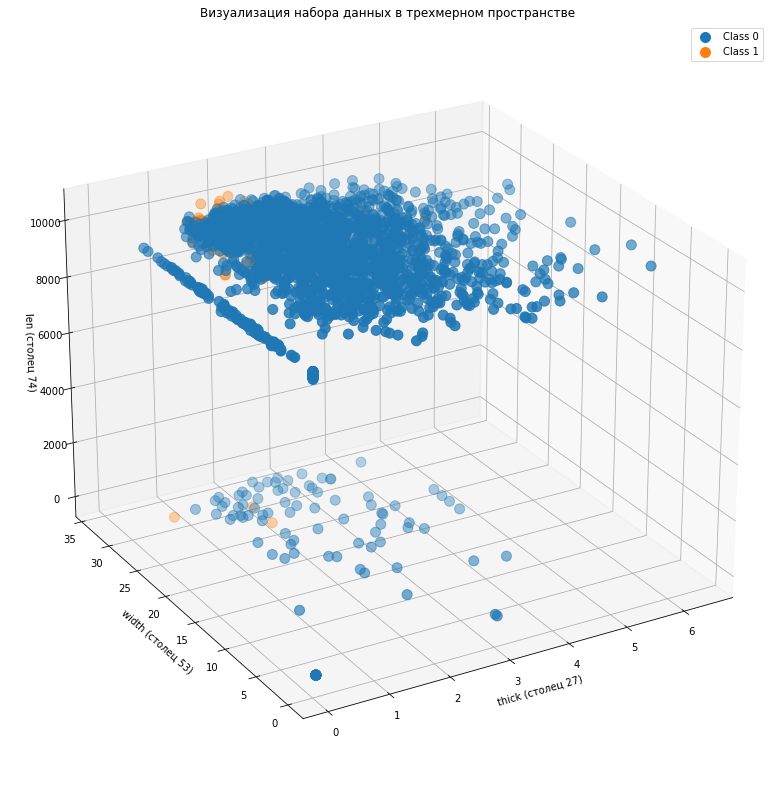

In [372]:
fig = plt.figure(figsize=(14, 14))
ax = plt.axes(projection='3d')
y = my_data[74].astype(int)

for i in (y.unique()):
    row_ix = np.where(y == i)
    a = X[row_ix, 0]
    b = X[row_ix, 1]
    c = X[row_ix, 2]
    ax.scatter(a, b, c, s=100, label=f'Class {i}')  # изменение подписи в легенде

ax.set_xlabel('thick (столец 27)')
ax.set_ylabel('width (столец 53)')
ax.set_zlabel('len (столец 74)')

plt.title('Визуализация набора данных в трехмерном пространстве')
plt.legend()

# настройка видового угла
ax.view_init( azim=-120, elev=25 );
plt.show()

5. Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

Алгоритм снижения размерности данных – удаление признака с самой низкой дисперсией

In [373]:
# набор данных с признаками для восьмого пункта
X3 = X
X3

array([[3.1000e+00, 1.2500e+01, 1.0330e+04, 0.0000e+00],
       [3.4000e+00, 1.7800e+01, 1.0275e+04, 0.0000e+00],
       [3.5000e+00, 1.8700e+01, 1.0235e+04, 0.0000e+00],
       ...,
       [1.9000e+00, 1.7700e+01, 1.0275e+04, 0.0000e+00],
       [2.1000e+00, 1.9900e+01, 1.0245e+04, 0.0000e+00],
       [2.5000e+00, 2.0700e+01, 1.0220e+04, 0.0000e+00]])

In [374]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.06 * (1 - .06)))
sel.fit_transform(X)

array([[3.1000e+00, 1.2500e+01, 1.0330e+04, 0.0000e+00],
       [3.4000e+00, 1.7800e+01, 1.0275e+04, 0.0000e+00],
       [3.5000e+00, 1.8700e+01, 1.0235e+04, 0.0000e+00],
       ...,
       [1.9000e+00, 1.7700e+01, 1.0275e+04, 0.0000e+00],
       [2.1000e+00, 1.9900e+01, 1.0245e+04, 0.0000e+00],
       [2.5000e+00, 2.0700e+01, 1.0220e+04, 0.0000e+00]])

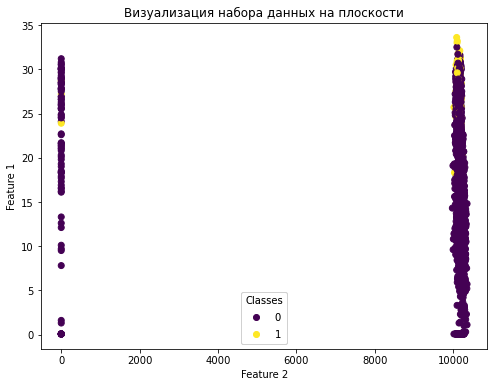

In [375]:
y = X[:, -1]  # Метки классов
X = X[:, :-1]  # Признаки

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, y)

# Выбор двух наиболее важных признаков
important_features = np.argsort(model.feature_importances_)[-2:]
X_reduced = X[:, important_features]

# Визуализация на плоскости
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

# Создание легенды
legend = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend)

# Подписи осей
plt.xlabel(f'Feature {important_features[0]}')
plt.ylabel(f'Feature {important_features[1]}')
plt.title('Визуализация набора данных на плоскости')

# Показать график
plt.show()

6. Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К<10 и определите оптимальное значение параметра К с минимальной долей ошибок.

In [376]:
X = X[:, :-1]
X

array([[ 3.1, 12.5],
       [ 3.4, 17.8],
       [ 3.5, 18.7],
       ...,
       [ 1.9, 17.7],
       [ 2.1, 19.9],
       [ 2.5, 20.7]])

In [377]:
y.shape, X.shape

((2534,), (2534, 2))

In [378]:
# разделение на обучающую и тестовые выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=666)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1900, 2), (1900,), (634, 2), (634,))

In [379]:
# классификация тестовой выборки
from sklearn.neighbors import KNeighborsClassifier

min_err = 1
best_k = -1

for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    err = round(np.mean(y_pred!=y_test),3)
    if err < min_err:
        best_k = k
        min_err = err
        
print("Оптимальное k =", best_k)
print("Минимальная доля ошибок =", min_err)

Оптимальное k = 8
Минимальная доля ошибок = 0.062


7. Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок.

In [380]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [381]:
from sklearn.metrics import classification_report,confusion_matrix

conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[595   0]
 [ 39   0]]


In [382]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       595
         1.0       0.00      0.00      0.00        39

    accuracy                           0.94       634
   macro avg       0.47      0.50      0.48       634
weighted avg       0.88      0.94      0.91       634



8. Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов:

- наивного байесовского классификатора
- классификатора метода К ближайших соседей для значения К, определенного в п. 6.

In [383]:
X3 = X3 [:, :-1]
X3

array([[3.1000e+00, 1.2500e+01, 1.0330e+04],
       [3.4000e+00, 1.7800e+01, 1.0275e+04],
       [3.5000e+00, 1.8700e+01, 1.0235e+04],
       ...,
       [1.9000e+00, 1.7700e+01, 1.0275e+04],
       [2.1000e+00, 1.9900e+01, 1.0245e+04],
       [2.5000e+00, 2.0700e+01, 1.0220e+04]])

In [384]:
# разделение на обучающую и тестовые выборки

X_train2, X_test2, y_train2, y_test2 = train_test_split(X3, y, test_size=0.25)
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((1900, 3), (1900,), (634, 3), (634,))

In [385]:
# модель классификации на базе наивного байесовского классификатора

from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train2,y_train2)
y_pred2 = nbc.predict(X_test2)

In [386]:
# модель на базе классификатора метода K ближайших соседей 

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train2, y_train2)
y_pred3 = knn.predict(X_test2)

9. Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя.

Метод валидации модели – повторяющиеся случайные разбиения на обучающую и тестовую выборки по 5 блокам 

Показатель качества модели – коэффициент Жаккара (jaccard)  

In [387]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# валидация модели
kfold_split = ShuffleSplit(n_splits=5, test_size=0.25)

# Оценка качества наивного байесовского классификатора
results_kfold_split_nbc = cross_val_score(nbc, X3, y, scoring='jaccard_macro', cv=kfold_split)
print("Среднее значение (дисперсия): %.2f (%.2f)" % (results_kfold_split_nbc.mean(), 
                                     results_kfold_split_nbc.std())) 

Среднее значение (дисперсия): 0.44 (0.05)


In [388]:
# Оценка качества классификатора метода K ближайших соседей
results_kfold_split_knn = cross_val_score(knn, X3, y, scoring='jaccard_macro', cv=kfold_split)
print("Среднее значение (дисперсия): %.2f (%.2f)" % (results_kfold_split_knn.mean(), 
                                     results_kfold_split_knn.std()))

Среднее значение (дисперсия): 0.47 (0.00)


10. Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

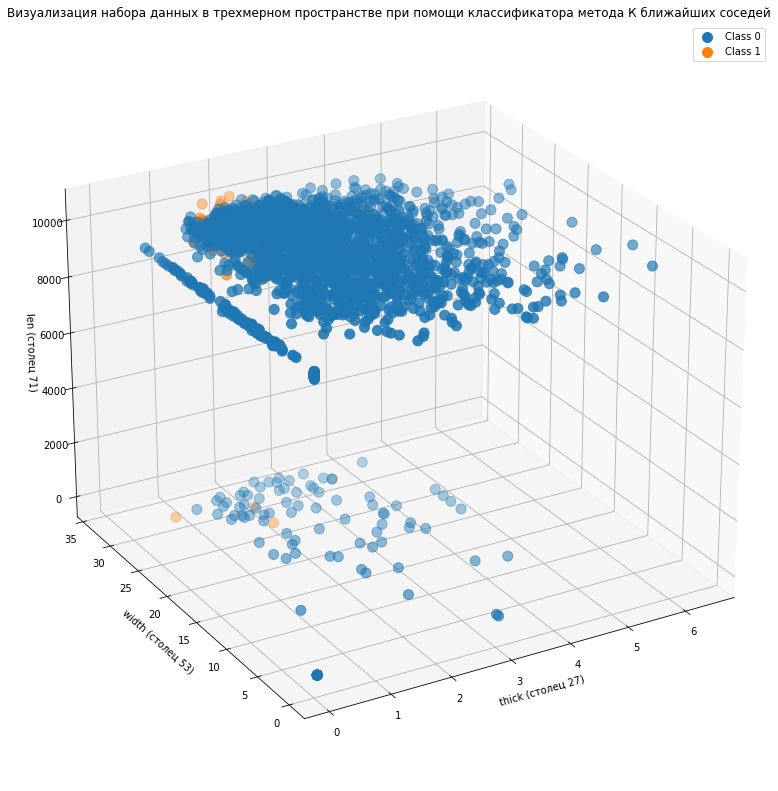

In [397]:
fig = plt.figure(figsize=(14, 14))
ax = plt.axes(projection='3d')
y = knn.predict(X8)

for i in ([0,1]):
    row_ix = np.where(y == i)
    a = X3[row_ix, 0]
    b = X3[row_ix, 1]
    c = X3[row_ix, 2]
    ax.scatter(a, b, c, s=100, label=f'Class {i}')  # изменение подписи в легенде

ax.set_xlabel('thick (столец 27)')
ax.set_ylabel('width (столец 53)')
ax.set_zlabel('len (столец 71)')

plt.title('Визуализация набора данных в трехмерном пространстве при помощи классификатора метода К ближайших соседей')
plt.legend()

# настройка видового угла
ax.view_init( azim=-120, elev=25 );
plt.show()